<a href="https://colab.research.google.com/github/Chenling8181/IEOR4500/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style='color:red'>Project 1</span>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 90% !important; }</style>"))

C:\Users\00\AppData\Local\Temp\ipykernel_51136\1189900070.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


#### In this project we use dynamic programming to create a trading schedule that maximizes total number of shares traded, under a model of liquidity impact with memory

In [5]:
import csv
import sys
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt

# #### Suppose we have a total of N shares that we would like to trade over T time periods.  To do so, we produce a schedule
$$ (n_0, n_1, \ldots, n_{T-1}) \quad \text{where each} \quad n_i \ge 0$$
#### Each $n_i$ represents the quantity that we will attempt  to trade at time $i = 0, 2, \ldots, T-1$.  In reality the market will only allow us to trade a smaller quantity at each time period.  We impose the conditions:
$$ \sum_{i=0}^{T-2} n_i \ \le N \quad \text{and} \quad n_{T-1} = N - \text{quantity traded so far}$$
#### This plays out as follows.  Assume that $\alpha > 0$ (and very small) and $0 < \pi < 1$ are given parameters.  Then we run the following process:
#### 1. Initialize $M = 0$.  Then for $i = 0, 2, \ldots, T-1$ we do the following:
#### 2. Compute $M \leftarrow \lceil 0.1*M + 0.9*n_i\rceil$.
#### 3. At time $i \le T-1$ we trade $S_i \ = \ \lceil(1 - \alpha M^\pi)n_i \rceil$ shares.  
#### 4. Note that $n_{T-1} = N \, - \, \sum_{i = 0}^{T-2} n_i$.

#### <span style='color:red'>Example:  N = 10000, T = 4,   $\alpha = 0.001$,   $\pi = 0.5$</span>


In [6]:
M = 0
T = 10
N = 1000
alpha = 1e-3
pi = 0.5
S = np.zeros(T,dtype='i')
n  = np.ones(T)*(N/T) # note that we index the array starting from zero
print("Planned sales schedule:",n,"; total planned = ",np.sum(n))
total = 0
for i in range(T):
    M = math.ceil(0.1*M + 0.9*n[i])
    S[i] = math.ceil((1 - alpha*M**pi)*n[i])
    total += S[i]
    print('at time %d, M = %d and we trade %d shares' %(i,M,S[i]))
print('total sold =', total, "i.e., as a percentage,",100*np.sum(S)/np.sum(n),"of the total planned.")

Planned sales schedule: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.] ; total planned =  1000.0
at time 0, M = 90 and we trade 100 shares
at time 1, M = 99 and we trade 100 shares
at time 2, M = 100 and we trade 99 shares
at time 3, M = 100 and we trade 99 shares
at time 4, M = 100 and we trade 99 shares
at time 5, M = 100 and we trade 99 shares
at time 6, M = 100 and we trade 99 shares
at time 7, M = 100 and we trade 99 shares
at time 8, M = 100 and we trade 99 shares
at time 9, M = 100 and we trade 99 shares
total sold = 992 i.e., as a percentage, 99.2 of the total planned.


In [7]:
M = 0
T = 10
N = 1000
alpha = 1e-3
pi = 0.5
S = np.zeros(T,dtype='i')
n  = np.array([45,102,99,99,99,99,99,99,99,160]) # note that we index the array starting from zero
print("Planned sales schedule:",n,"; total planned = ",np.sum(n))
total = 0
for i in range(T):
    M = math.ceil(0.1*M + 0.9*n[i])
    S[i] = math.ceil((1 - alpha*M**pi)*n[i])
    total += S[i]
    print('at time %d, M = %d and we trade %d shares' %(i,M,S[i]))
print('total sold =', total, "i.e., as a percentage,",100*np.sum(S)/np.sum(n),"of the total planned.")

Planned sales schedule: [ 45 102  99  99  99  99  99  99  99 160] ; total planned =  1000
at time 0, M = 41 and we trade 45 shares
at time 1, M = 96 and we trade 102 shares
at time 2, M = 99 and we trade 99 shares
at time 3, M = 100 and we trade 99 shares
at time 4, M = 100 and we trade 99 shares
at time 5, M = 100 and we trade 99 shares
at time 6, M = 100 and we trade 99 shares
at time 7, M = 100 and we trade 99 shares
at time 8, M = 100 and we trade 99 shares
at time 9, M = 154 and we trade 159 shares
total sold = 999 i.e., as a percentage, 99.9 of the total planned.


In [8]:
M = 0
T = 4
N = 1000*5
alpha = 1e-3
pi = 0.5
S = np.zeros(T,dtype='i')
n  = np.array([1043,1256,1305,1396]) # note that we index the array starting from zero
print("Planned sales schedule:",n,"; total planned = ",np.sum(n))
total = 0
for i in range(T):
    M = math.ceil(0.1*M + 0.9*n[i])
    S[i] = math.ceil((1 - alpha*M**pi)*n[i])
    total += S[i]
    print('at time %d, M = %d and we trade %d shares' %(i,M,S[i]))
print('total sold =', total, "i.e., as a percentage,",100*np.sum(S)/np.sum(n),"of the total planned.")

Planned sales schedule: [1043 1256 1305 1396] ; total planned =  5000
at time 0, M = 939 and we trade 1012 shares
at time 1, M = 1225 and we trade 1213 shares
at time 2, M = 1297 and we trade 1259 shares
at time 3, M = 1387 and we trade 1345 shares
total sold = 4829 i.e., as a percentage, 96.58 of the total planned.


### <span style='color:red'>Task 1: </span>code a dynamic programming algorithm that computes an optimal schedule of trades $(n_0, n_1, \ldots, n_{T-1})$ with the goal of maximizing the total number of traded shares
#### Make sure that your code runs well for a range of values of $\alpha$ and $\pi$
#### Compute the optimal schedule when $\alpha = 0.001$, $\pi = 0.5$, $N = 100000$ and $T = 10$.   Denote this schedule by $(S_0, S_1, \ldots, S_9)$.

In [9]:
def sell_give_m_n(m,n_array):
  new_m = np.ceil(0.1*m+0.9*n_array)
  return np.ceil((1-alpha*new_m**pi)*n_array)

In [11]:
T = 10
N = 1000

alpha = 1e-3
pi = 0.5

# S(time_period, previous_momentum, n_shares_left)
S = np.full((T, N+1, N+1), -np.inf)
# decisions(time_period, previous_momentum, n_shares_left)
decisions= np.full((T, N+1, N+1), -np.inf)

iarray = np.array(range(N+1))
revi = N - iarray

# Base case: final period, you announce to sell whatever number of shares you have.
for n in range(N+1):
  M = np.ceil(0.1*iarray+0.9*n)
  S[T-1,:,n]=np.ceil((1 - alpha*M**pi)*n)


candidates = np.full((N+1), -np.inf)
for t in range(T-2,-1,-1):
  for m in range(N+1):
    for n in range(N+1):
      # dynamic programming recurrence.
      np.copyto(candidates[:n+1],  sell_give_m_n(m,iarray[0:n+1])+ S[t+1,np.ceil(0.1*m+0.9*iarray[0:n+1]).astype(int), revi[N-n:]])
      S[t,m, n] = np.max(candidates[:n+1])
      # store your decision.
      decisions[t,m, n] = np.argmax(candidates[:n+1])

#print your final solution
print( 'Total sold', S[0,0,N], 'as a percentage', S[0,0,N]/N *100, 'of shares the total planned')

#back out schedule decisions.
m=0
n = N
schedule= np.full((T), -np.inf)
for t in range(T-1):
  announcement = int(decisions[t,m, n])
  schedule[t]=announcement
  m=int(np.ceil(0.1*m+0.9*announcement))
  n -= announcement

schedule[T-1]=N - np.sum(schedule[:T-1])
print('The schedule is :', schedule)

Total sold 999.0 as a percentage 99.9 of shares the total planned
The schedule is : [ 45. 102.  99.  99.  99.  99.  99.  99.  99. 160.]


### <span style='color:red'>Task 2. Test the effectiveness of this computed schedule using the first 2 hours of each day in the TSLA data </span>
To do so, we divide the first 2 hours of each day into 12 separate intervals of ten minutes each.
Each interval is evaluated as follows.  Suppose that the traded volume in that interval is given by the numbers $(V_0, V_1, \ldots, V_9)$.
Then the interval score we assign to our schedule is given by
$$ \sum_{i = 0}^9 \min\{ S_i, V_i/100 \}.$$
Effectively, this scheme allows us to trade up to a volume of 1% of what the market actually traded.

#### The TOTAL SCORE we assign to our schedule is the average of the all interval scores, averaged over the first 12 intervals of all the days in the first half of our data
#### In other words, if we have 300 days of data, we take the first 150, and we get in total 12x150 = 1800 intervals

total number of rows: 121217
first ten entries of column 6: ['736210' '189614' '277161' '199721' '463918' '420022' '289789' '218539'
 '192662' '130332']
total number of rows: 121217
size of some selected entries: [5 5 5 5 4 0 0 0 0 0]
first blank at 51625
check: 4 0
first 736210 last 5050


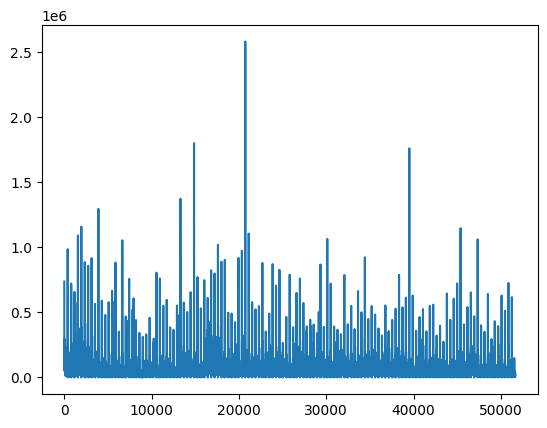

In [28]:
filename = 'TSLA.csv'
f = open(filename,'r')
csvf = csv.reader(f)
thelist = list(csvf)
f.close()
numobservations = len(thelist)
print('total number of rows:', numobservations)
nlist = np.array(thelist)
stringvolume = nlist[4:51630,6] #column 6 (from 0) has the trading volume per minute
print('first ten entries of column 6:',stringvolume[:10])
#convert to integers
#let's try to guess what the problem is
numobservations = len(thelist)
print('total number of rows:', numobservations)
nlist = np.array(thelist)
stringvolume = nlist[4:,6] 
# One solution.  Most efficient? Find the length of each entry and use that to find the first empty one.
# Well, it works.
length_checker = np.vectorize(len)  

v_len = length_checker(stringvolume)
#v_len will be an array whose kth entry is the length of the string in position k in stringvolume
print('size of some selected entries:',v_len[51620:51630])

first0 = np.argmin(v_len)
print('first blank at', first0)
print('check:', v_len[first0-1], v_len[first0])
numactual = first0
#and convert to integers

volume = stringvolume[:numactual].astype(int) #in other words I am taking all entries up to the first blank one
#check
print('first', volume[0], 'last', volume[numactual-1])
plt.plot(volume)

In [44]:
nlist = np.array(thelist)
stringdt = nlist[4:51630,0] #column 6 (from 0) has the trading volume per minute
#convert to datetime
from datetime import datetime
from dateutil import parser
dt = np.zeros(numactual,dtype='datetime64[s]')
for i in range(numactual):
    dt[i] = parser.parse(stringdt[i])
#check
print('first', dt[0], 'last', dt[numactual-1])
#how many days of data do we have?
numdays = (dt[numactual-1]-dt[0])/ np.timedelta64(1, 'D')
print('number of days of data:', numdays)

first 2021-01-04T09:30:00 last 2021-07-13T15:49:00
number of days of data: 190.26319444444445


In [50]:
#extract first 95 days
firstday = dt[0]
lastday = firstday + np.timedelta64(96, 'D')
mask = (dt >= firstday) & (dt <= lastday)
dt = dt[mask]
#check
print('first', dt[0], 'last', dt[-1])
#how many days of data do we have?
numdays = (dt[-1]-dt[0])/ np.timedelta64(1, 'D')
print('number of days of data:', numdays)
dtlen = dt.size
print(dtlen)

first 2021-01-04T09:30:00 last 2021-04-09T16:29:00
number of days of data: 95.29097222222222
26202


In [115]:
idx = np.concatenate([np.where(dt == dt[0] + a * np.timedelta64(1, 'D'))[0] for a in range(96) ])
idx

array([    0,   391,   782,  1173,  1564,  1955,  2346,  2738,  3129,
        3520,  3911,  4302,  4693,  5084,  5475,  5866,  6257,  6648,
        7040,  7431,  7822,  8213,  8604,  8995,  9386,  9777, 10168,
       10559, 10950, 11341, 11732, 12123, 12514, 12905, 13297, 13688,
       14079, 14470, 14861, 15252, 15643, 16034, 16425, 16816, 17207,
       17598, 17989, 18380, 18771, 19162, 19553, 19945, 20336, 20727,
       21118, 21509, 21900, 22291, 22682, 23073, 23464, 23855, 24246,
       24637, 25029, 25420, 25811], dtype=int64)

In [122]:
itvVolume = []

for i in idx:
    cr = i
    for j in range(12):
        itvVolume.append(np.sum(volume[cr:cr+10]))
        cr = cr + 10
itvVolume = np.array(itvVolume)
itvVolume.size/12


67.0

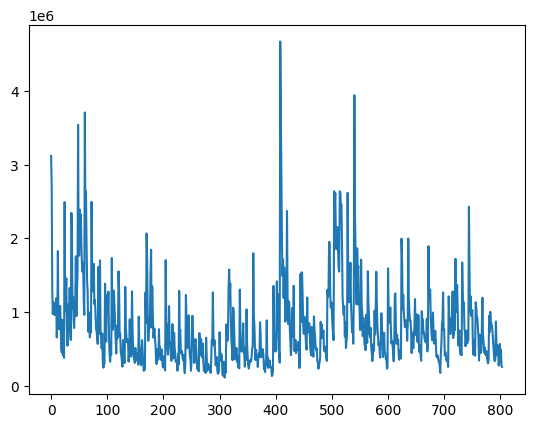

In [123]:
plt.plot(itvVolume)

### <span style='color:red'>Task 3:</span>  code an algorithm that (approximately) does the following:
#### 1. It approximately enumerates all possible values for $\pi$ between $0.3$ and $0.7$
#### 2. It approximately computes the value of $\pi$ that maximizes the TOTAL SCORE, when $N = 100000$, $T = 10$ and $\alpha = 0.001$.
#### 3. This means that we run the DP algorithm (under the chosen value of $\pi$) and then evaluate as above to compute the TOTAL SCORE.